In [7]:
#Loading abalone data in pandas datframe
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns





from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')



from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets



In [3]:
df= pd.read_csv(r'abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
#Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, so I created a numeric feature: 1:Male, 2: Female, 3:Infant
sex_dictionary = {'M': 1, 'F' : 2,'I':3}
df['Sex'] = df['Sex'].apply(lambda x: sex_dictionary[x])


In [9]:
#Finding datatype of all the variables
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [10]:
#Finding the shape
print(df.shape)
print(df.columns)


(4177, 9)
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [12]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Classification of Abalones Data

Goal: Predicting age of abalones

Input variables: Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings

· Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, so I created a numeric feature: 1:Male, 2: Female, 3:Infant

· There are no missing/null values in dataset. At 2 places height is 0mm , but considering it in mm we can ignore it considering 4000 rows

· Added age column in the dataframe for classification. Age is classified based on the number of rings.

Rings 1-8 -->Age 1, denoting young

Rings 9-10 -->Age 2, denoting middle

Rings 11-29 -->Age 3, denoting old

In [15]:
def label_race (row):
   if row['Rings']>=1 and row['Rings']<=8:
      return 1
   elif row['Rings'] >=9 and row['Rings']<=10:
      return 2
   elif row['Rings']>=11 and row['Rings']<=29:
      return 3
   return 0

In [16]:
df['Age'] = df.apply(lambda _: '', axis=1)

In [17]:
df['Age']=df.apply (lambda row: label_race (row),axis=1)

In [18]:
df.Sex = df.Sex.astype(float)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [19]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,3.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,3.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


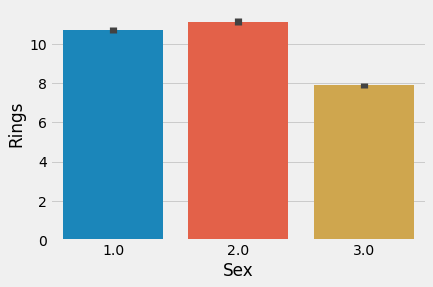

In [27]:


ax = sns.barplot(x="Sex", y="Rings", data=df)


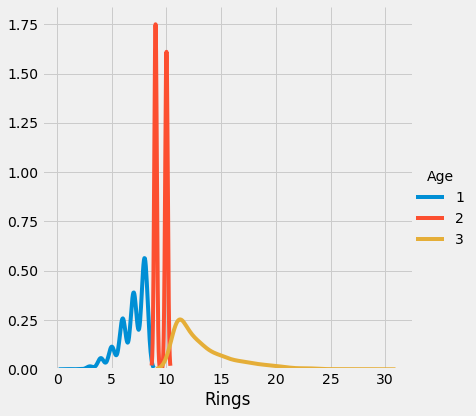

In [30]:
sns.plt=sns.FacetGrid(df, hue="Age", size=6) \
   .map(sns.kdeplot, "Rings") \
   .add_legend()


Age labelled 1 are youth, label 2 are middle aged and 3 are old aged. Young abalones have 0-10 rings, Middle aged abalones have 9-11 rings and old abalones have more than 10 rings

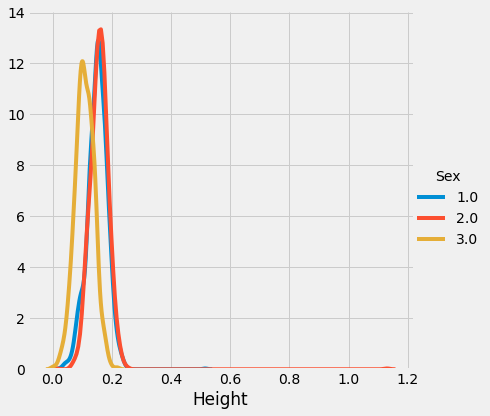

In [32]:
sns.FacetGrid(df, hue="Sex", size=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()



Female abalones have more height than males and infants. Height of infants is between 0 to 0.3mm
Classification
Response variable is age

In [49]:
Y = df[['Age']]
Y 

,Age
0,3
1,1
2,2
3,2
4,1
...,...
4172,3
4173,2
4174,2
4175,2


In [55]:
X=df.drop(['Age','Rings'], axis=1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


<AxesSubplot:>

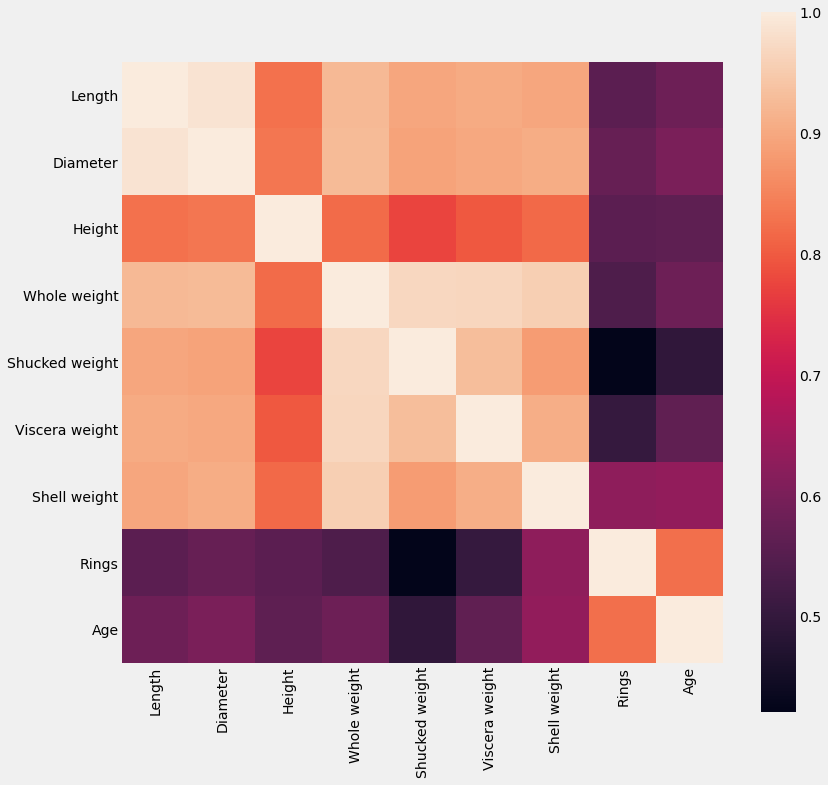

In [50]:
#Plotting correlation matrix
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)


<Figure size 432x288 with 0 Axes>

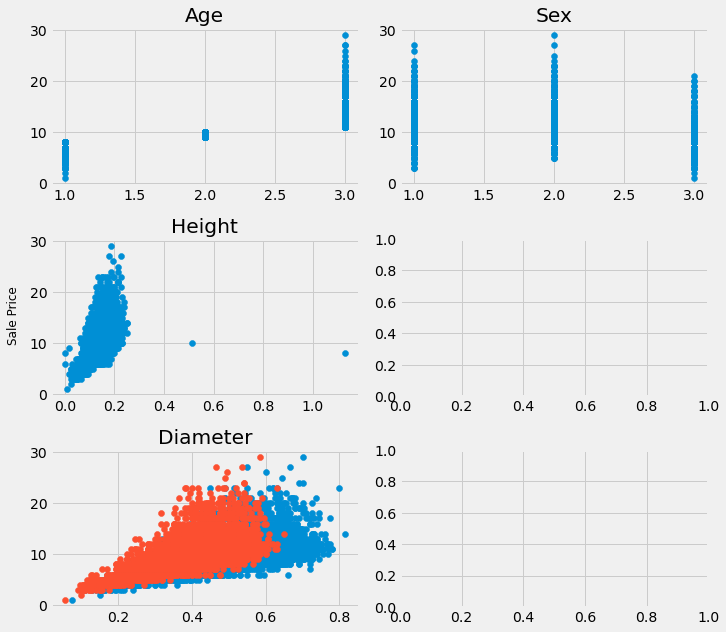

In [51]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
ring = df.Rings.values
axarr[0, 0].scatter(df.Age.values, ring)
axarr[0, 0].set_title('Age')
axarr[0, 1].scatter(df.Sex.values, ring)
axarr[0, 1].set_title('Sex')
axarr[1, 0].scatter(df.Height.values, ring)
axarr[1, 0].set_title('Height')
axarr[2, 0].scatter(df.Length.values, ring)
axarr[2, 0].set_title('Length')
axarr[2, 0].scatter(df.Diameter.values, ring)
axarr[2, 0].set_title('Diameter')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

Height of abalones is in the range of 0 to 0.2mm, most abalones are old aged.

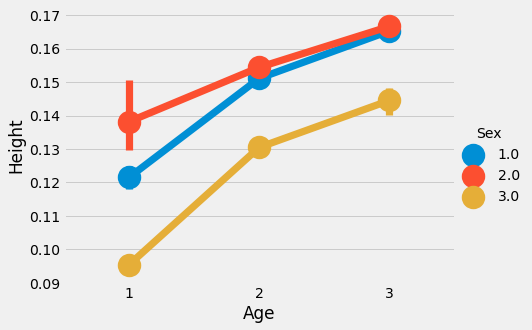

In [52]:
sns.factorplot('Age', 'Height', hue = 'Sex', estimator = np.mean, data = df, 
             size = 4.5, aspect = 1.4)



Female abalones have largest height. Male abalones have height ranging from 0.12 to 0.15mm.
Dividing the dataset into 75% training and 25% test data using train_test_split

In [65]:


from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y) 

In [68]:




x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing 
print("train_df_x:")
print(train_X.shape)

print("train_df_y:")
print(train_y.shape)

print("test_df_x:")
print(test_X.shape)

print("test_df_y:")
print(test_y.shape)

train_df_x:
(3132, 8)
train_df_y:
(3132, 1)
test_df_x:
(1045, 8)
test_df_y:
(1045, 1)


In [69]:
def getAccuracy(testSet, predictions):

    correct = 0

    for x in range(len(testSet)):

        if testSet[x][-1] == predictions[x]:

            correct += 1

    return (correct/float(len(testSet))) * 100.0